# Homework 6
## Astro 530 - Stellar Atmospheres

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.interpolate import interp1d

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11

### 11. Partition Functions

In [2]:
def _getPartition(species, table):
    T = 5040 / np.linspace(0.2, 2.0, 10)
    log_u = table.loc[species][0:10].to_numpy()
    
    # remove nans so scipy doesn't get mad
    good = np.where(~np.isnan(log_u))[0]
    T = T[good]
    log_u = log_u[good]
    
    # interpolate data points
    f = interp1d(T, log_u, fill_value = 'extrapolate')
    return f
    
def partition(species, T, table):
    if species == 'H-':
        u = np.ones_like(T)
    else:
        logU = _getPartition(species, table)
        u = 10 ** logU(T)
    return u 

In [3]:
table = pd.read_table('./data/RepairedPartitionFunctions.txt', header=None, na_values='-', delim_whitespace=True)
table = table.set_index(0)

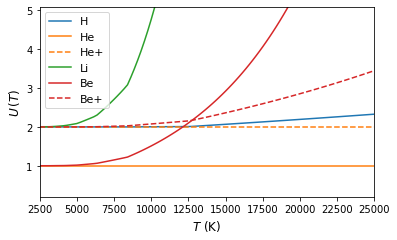

In [4]:
T = np.linspace(2500, 25000, 100)
plt.figure(figsize = (6, 3.5))
c = -1
for i, s in enumerate(['H', 'He', 'He+', 'Li', 'Be', 'Be+']):
    if '+' not in list(s):
        c+=1
        ls = '-'
    else:
        ls= '--'
    plt.plot(T, partition(s, T, table), color = 'C' + str(c), ls = ls, label = s)
plt.xlabel('$T$ (K)')
plt.ylabel('$U\,(T)$')
plt.ylim(0.2, 5.1)
plt.legend()
plt.savefig('parts.png', bbox_inches = 'tight')
plt.show()